In [184]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load your custom model
model_path = "C:/Users/lisat/OneDrive/Documents/GitHub/Project-2.2_Group-14/src/main/java/com/example/g14/NeuralNetworks/SavedNetworks/ART_CNN_4Layers_Dropout_0-2_save_at_28.keras"
model = tf.keras.models.load_model(model_path)


In [144]:
print(tf.__version__)

2.16.1


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[0.16466472]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


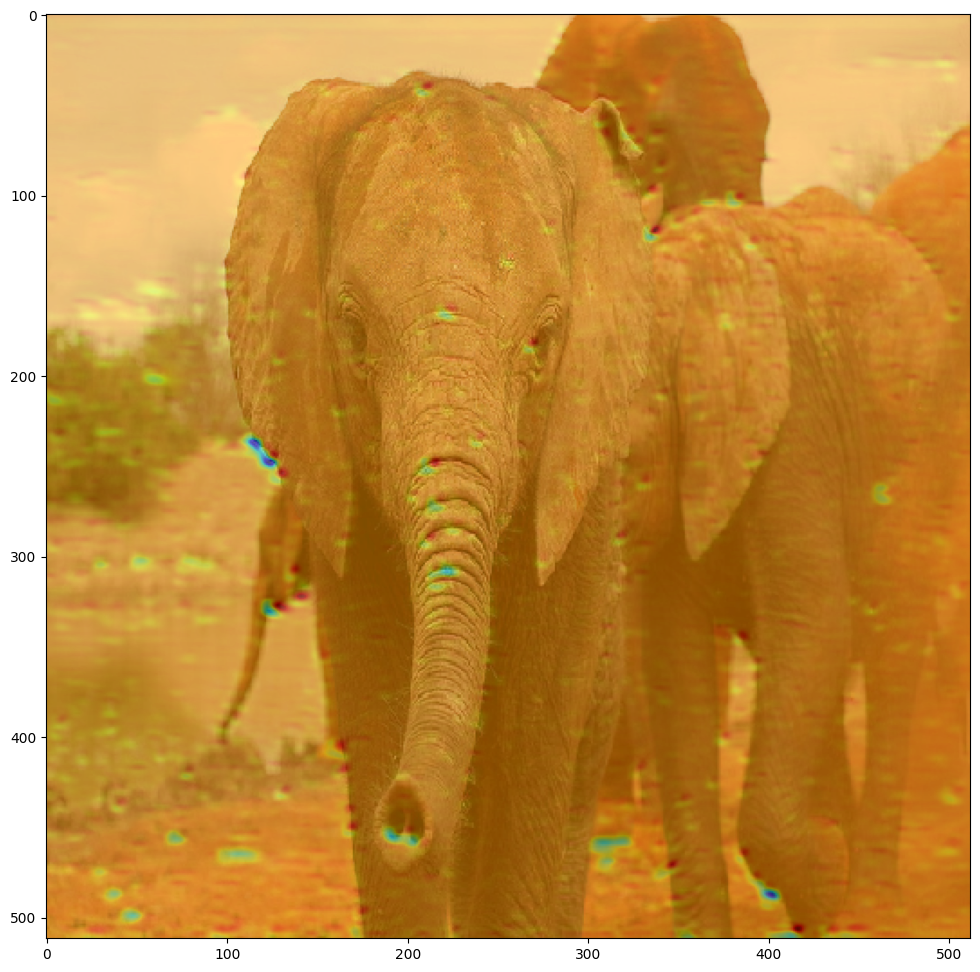

In [200]:
from scipy.ndimage import zoom
img_path = "C:/Users/lisat/OneDrive/Documents/Maastricht/2-6 Project 2.2/test_dataset/REAL/real_animal4.jpg"
model_path = "C:/Users/lisat/OneDrive/Documents/GitHub/Project-2.2_Group-14/src/main/java/com/example/g14/NeuralNetworks/SavedNetworks/ART_ResNet_save_at_21_2.keras"
layer_name = 'conv2d_24'
dense_layer = 'dense_1'

def do_heatmap(img_path,model_path,layer_name):
    model = tf.keras.models.load_model(model_path)
    model.build(input_shape=(None, 512, 512, 3))
    dummy_input = np.random.random((1, 512, 512, 3)).astype(np.float32)
    _ = model.predict(dummy_input)
    
    img = image.load_img(img_path, target_size=(512, 512))  # Adjust target_size as per your model input
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Assuming your model expects inputs in the range [0, 1]

    print(model.predict(x))

  # Change this to the correct name of the layer you want to visualize
    last_conv_layer = model.get_layer(layer_name).output
    pred_layer = model.get_layer(dense_layer).output
    intermediate_layer_model = tf.keras.models.Model(model.inputs, outputs=[last_conv_layer, pred_layer])
    conv,pred = intermediate_layer_model.predict(x)

    target = np.argmax(pred, axis=1).squeeze()
    w, b = intermediate_layer_model.get_layer(dense_layer).weights
    weight = w[:, target].numpy()

    heatmap = conv.squeeze(axis=0) 
    heatmap_2d = np.mean(heatmap, axis=-1)  

    scale_x = 512 / heatmap_2d.shape[1]
    scale_y = 512 / heatmap_2d.shape[0]
    zoom_tuple = (scale_y, scale_x)  # Zoom for 2D array

    plt.figure(figsize = (12,12))
    plt.imshow(img)
    plt.imshow(zoom(heatmap_2d, zoom = zoom_tuple), cmap='jet',alpha= 0.5)

do_heatmap(img_path,model_path,layer_name)

In [1]:
def load_model(path):
    try:
        model = tf.keras.models.load_model(path)
        return model
    except Exception as e:
        print(f"Error loading model from {path}: {e}")
        return None
    
models = {
    'model_CNN_art_dataset': '/Users/nathanbouquet/Downloads/ART_CNN_dropout_0-2_save2_at_30.keras',
    'model_CNN_art_dataset_dropout': '/Users/nathanbouquet/Downloads/ART_CNN_dropout_0-2_save2_at_30.keras',
    'model_CNN_art_dataset_FourLayers_dropout': '/Users/nathanbouquet/Downloads/ART_CNN_4Layers_Dropout_0-2_save_at_28.keras',
    'model_RNN_art_dataset': '/Users/nathanbouquet/Downloads/ART_ResNet_save_at_24_2.keras',
    'model_RNN_shoe_dataset': '/Users/nathanbouquet/Downloads/Shoe_ResNet_save_at_11.keras'
}

for name, path in models.items():
    model = load_model(path)
    print(f"Model: {name}")
    model.summary()

: 

In [176]:
# Load and preprocess the image
img_path = "C:/Users/lisat/OneDrive/Documents/Maastricht/2-6 Project 2.2/test_dataset/FAKE/ai_animal.png"
img = image.load_img(img_path, target_size=(512, 512))  # Adjust target_size as per your model input
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Assuming your model expects inputs in the range [0, 1]

In [44]:
print(x.shape)

(1, 512, 512, 3)


In [147]:
# Ensure the model is built
model.build(input_shape=(None, 512, 512, 3))
dummy_input = np.random.random((1, 512, 512, 3)).astype(np.float32)
_ = model.predict(dummy_input)
model.summary()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 510, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304,709 (1.16 MB)

 Trainable params: 101,569 (396.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,140 (793.52 KB)

In [177]:
print(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[0.9968458]]


In [164]:

# Get the layer and create the intermediate model
layer_name = 'conv2d_2'  # Change this to the correct name of the layer you want to visualize
last_conv_layer = model.get_layer(layer_name).output
pred_layer = model.get_layer('dense_1').output


In [178]:

intermediate_layer_model = tf.keras.models.Model(model.inputs, outputs=[last_conv_layer, pred_layer])
conv,pred = intermediate_layer_model.predict(x)

#Plot the heatmap of the activations


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


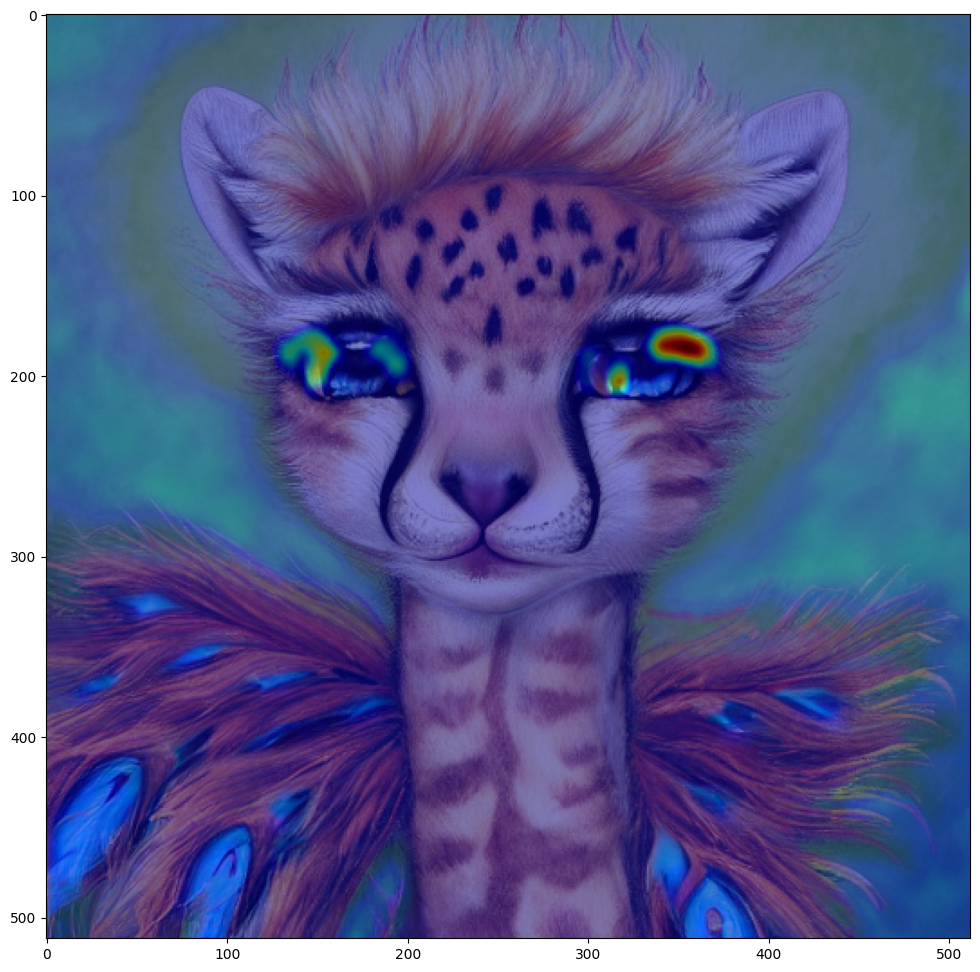

In [179]:
from scipy.ndimage import zoom

target = np.argmax(pred, axis=1).squeeze()
w, b = intermediate_layer_model.get_layer('dense').weights
weight = w[:, target].numpy()

heatmap = conv.squeeze(axis=0) 


heatmap_2d = np.mean(heatmap, axis=-1)  

scale_x = 512 / heatmap_2d.shape[1]
scale_y = 512 / heatmap_2d.shape[0]
zoom_tuple = (scale_y, scale_x)  # Zoom for 2D array

plt.figure(figsize = (12,12))
plt.imshow(img)
plt.imshow(zoom(heatmap_2d, zoom = zoom_tuple), cmap='jet',alpha= 0.5)
  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Heatmap shape: (60, 60)
Heatmap values range: 0.0 2.083558


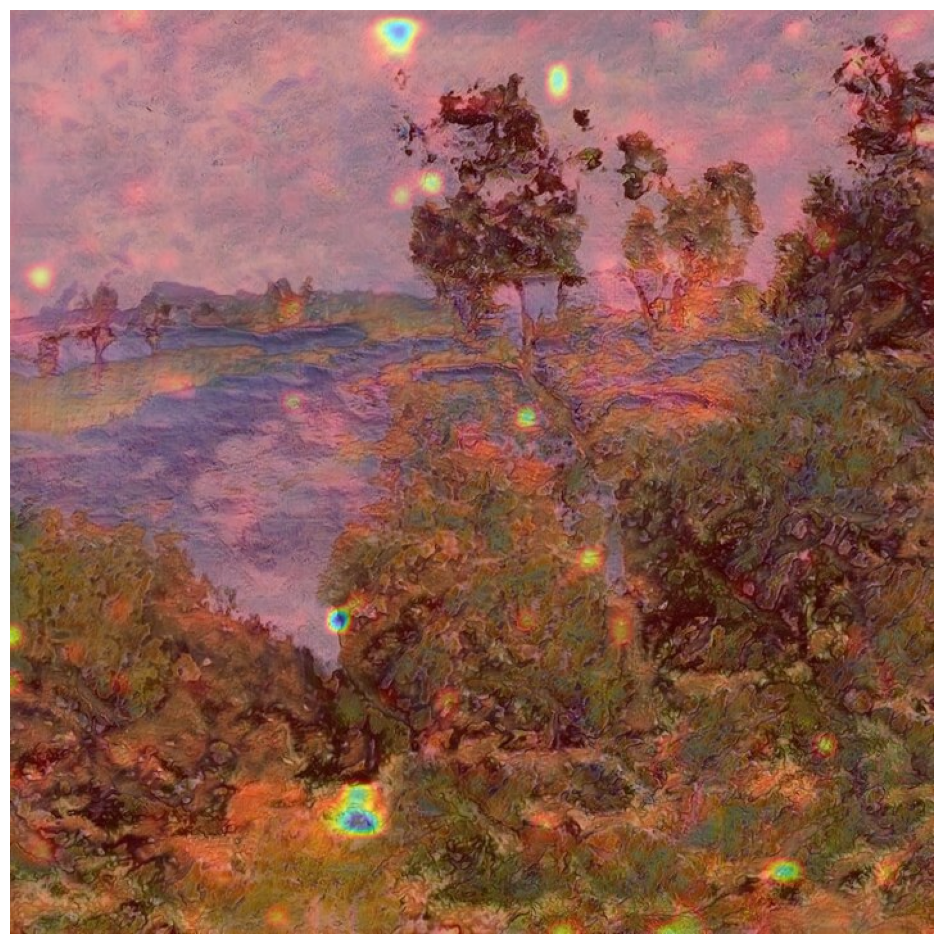

In [77]:
pred = model.predict(x)
target = np.argmax(pred, axis=1).squeeze()

# Get the weights of the final dense layer
dense_layer_weights, dense_layer_bias = model.get_layer('dense').get_weights()
weight = dense_layer_weights[:, target]

# Compute the heatmap
heatmap = conv.squeeze(axis=0)
heatmap_2d = np.mean(heatmap, axis=-1)

# Verify the heatmap values
print("Heatmap shape:", heatmap_2d.shape)
print("Heatmap values range:", np.min(heatmap_2d), np.max(heatmap_2d))

# Get the dimensions of the original image
original_img = image.load_img(img_path)
original_img_array = image.img_to_array(original_img)

# Calculate the scaling factors
scale_x = original_img_array.shape[1] / heatmap_2d.shape[1]
scale_y = original_img_array.shape[0] / heatmap_2d.shape[0]
zoom_tuple = (scale_y, scale_x)  # Zoom for 2D array

# Resize the heatmap
resized_heatmap = zoom(heatmap_2d, zoom=zoom_tuple)

# Normalize the resized heatmap
resized_heatmap = np.maximum(resized_heatmap, 0)
resized_heatmap /= np.max(resized_heatmap)

# Load the original image with OpenCV
import cv2
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply the heatmap on the image
heatmap = cv2.applyColorMap(np.uint8(255 * resized_heatmap), cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

# Display the image with heatmap
plt.figure(figsize=(12, 12))
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()
